In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib


sns.set(style="whitegrid")

### 1. Data Understanding

In [2]:
# Load the Dataset

df = pd.read_csv("../data/Airline_Delay_Cause.csv")

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [4]:
df.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.0,...,0.0,0.0,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.0,...,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.0,...,0.0,0.0,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0
171665,2013,8,F9,Frontier Airlines Inc.,MTJ,"Montrose/Delta, CO: Montrose Regional",1.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.sample(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
22772,2022,6,AS,Alaska Airlines Inc.,PHL,"Philadelphia, PA: Philadelphia International",60.0,8.0,2.42,0.94,...,0.00,3.00,0.0,0.0,372.0,105.0,126.0,66.0,0.0,75.0
26077,2022,4,AA,American Airlines Inc.,IND,"Indianapolis, IN: Indianapolis International",325.0,72.0,22.84,0.47,...,1.28,27.08,3.0,0.0,4279.0,1367.0,14.0,729.0,64.0,2105.0
103893,2018,6,OO,SkyWest Airlines Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",6.0,3.0,0.00,0.95,...,0.00,1.27,0.0,0.0,68.0,0.0,21.0,14.0,0.0,33.0
115568,2017,10,NK,Spirit Air Lines,LAS,"Las Vegas, NV: McCarran International",1068.0,113.0,22.36,2.08,...,1.73,34.42,7.0,2.0,6635.0,1212.0,112.0,2443.0,90.0,2778.0
116506,2017,9,OO,SkyWest Airlines Inc.,ELP,"El Paso, TX: El Paso International",74.0,10.0,3.50,0.00,...,0.00,1.98,0.0,0.0,397.0,199.0,0.0,124.0,0.0,74.0
36036,2021,11,YV,Mesa Airlines Inc.,PSP,"Palm Springs, CA: Palm Springs International",59.0,14.0,4.96,0.00,...,0.00,7.77,1.0,0.0,1091.0,538.0,0.0,38.0,0.0,515.0
122876,2017,3,OO,SkyWest Airlines Inc.,LSE,"La Crosse, WI: La Crosse Regional",167.0,42.0,7.89,2.51,...,0.00,18.89,5.0,0.0,3177.0,354.0,162.0,782.0,0.0,1879.0
118333,2017,7,OO,SkyWest Airlines Inc.,ITH,"Ithaca/Cortland, NY: Ithaca Tompkins Regional",85.0,6.0,4.00,0.00,...,0.00,1.85,0.0,0.0,464.0,289.0,0.0,11.0,0.0,164.0
95789,2018,11,YV,Mesa Airlines Inc.,MOB,"Mobile, AL: Mobile Regional",84.0,18.0,5.64,0.22,...,0.00,7.92,1.0,0.0,1139.0,353.0,43.0,115.0,0.0,628.0
104962,2018,5,EV,ExpressJet Airlines Inc.,LCH,"Lake Charles, LA: Lake Charles Regional",85.0,9.0,0.69,0.00,...,0.00,6.63,0.0,0.0,437.0,26.0,0.0,50.0,0.0,361.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [7]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [8]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [9]:
df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [10]:
df.shape

(171666, 21)

### Columns and Descriptions

- year: Year of the data record
- month: Month number (1–12)
- carrier: Airline code
- carrier_name: Full airline name
- airport: 3-letter airport code
- airport_name: Full airport name
- arr_flights: Total arriving flights
- arr_del15: Number of flights delayed 15+ minutes
- arr_cancelled: Cancelled flights
- arr_diverted: Diverted flights
- carrier_ct: Number of delays caused by airline operations
- weather_ct: Number of delays due to weather
- nas_ct: Number of delays due to air traffic (NAS)
- security_ct: Delays due to security
- late_aircraft_ct: Delays caused by previous late arrival
- arr_delay: Total delay minutes
- carrier_delay: Delay minutes caused by airline
- weather_delay: Delay minutes due to weather
- nas_delay: Delay minutes due to air traffic system
- security_delay: Delay minutes due to security
- late_aircraft_delay: Delay minutes due to late previous flight

In [11]:
# Check Unique Values for Important Categorical Columns

df['carrier'].unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'UA', 'WN', 'YX', 'QX', 'YV', 'EV', 'VX', 'US', 'FL'],
      dtype=object)

In [12]:
df['airport'].unique()

array(['ABE', 'ABY', 'AEX', 'AGS', 'ALB', 'ATL', 'AUS', 'AVL', 'AZO',
       'BDL', 'BGM', 'BGR', 'BHM', 'BNA', 'BQK', 'BTV', 'BUF', 'BWI',
       'CAE', 'CHA', 'CHO', 'CHS', 'CLE', 'CLT', 'CMH', 'CRW', 'CSG',
       'CVG', 'CWA', 'DAY', 'DCA', 'DHN', 'DLH', 'DSM', 'DTW', 'EVV',
       'EWR', 'FAR', 'FAY', 'FSD', 'GFK', 'GRR', 'GSO', 'GSP', 'GTR',
       'IAD', 'ILM', 'IND', 'ITH', 'JAX', 'JFK', 'LAN', 'LEX', 'LFT',
       'LGA', 'LIT', 'MBS', 'MCI', 'MEM', 'MGM', 'MKE', 'MLI', 'MLU',
       'MOB', 'MQT', 'MSN', 'MSP', 'MYR', 'OAJ', 'OMA', 'ORF', 'ORH',
       'PIT', 'PVD', 'PWM', 'RAP', 'RDU', 'RIC', 'ROA', 'ROC', 'RST',
       'SAV', 'SDF', 'SHV', 'STL', 'SYR', 'TLH', 'TRI', 'TVC', 'TYS',
       'VLD', 'XNA', 'ABQ', 'AMA', 'ANC', 'AVP', 'BFL', 'BOI', 'BOS',
       'BUR', 'BZN', 'CID', 'COS', 'DAB', 'DEN', 'DFW', 'DRO', 'ECP',
       'EGE', 'ELP', 'EUG', 'EYW', 'FAT', 'FCA', 'FLL', 'GEG', 'HNL',
       'HSV', 'IAH', 'ICT', 'JAC', 'KOA', 'LAS', 'LAX', 'LBB', 'LIH',
       'MCO', 'MDT',

In [13]:
df['month'].unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9])

### 2. Data Cleaning

In [14]:
# Drop unnecessary columns 

df = df.drop(columns=['carrier_name', 'airport_name'])

In [15]:
# Fill missing values with 0

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].fillna(0)

In [16]:
# Remove rows where no flights arrived

df = df[df['arr_flights'] > 0 ]

### 3. Feature Engineering

In [17]:
# Delay rate (% flights delayed)

df['delay_rate'] = df['arr_del15'] / df['arr_flights']

In [18]:
# Replace any NaN created by division

df['delay_rate'] = df['delay_rate'].fillna(0)

In [19]:
# Season extraction

df['season'] = df['month'].map({
    12:"winter", 1:"winter", 2:"winter",
    3:"spring", 4:"spring", 5:"spring",
    6:"summer", 7:"summer", 8:"summer",
    9:"fall", 10:"fall", 11:"fall"
})

In [20]:
# Total delay causes count

df["total_delay_causes"] = (
    df['carrier_ct'] +
    df["weather_ct"] +
    df["nas_ct"] +
    df["security_ct"] +
    df["late_aircraft_ct"]
)

In [21]:
# Outlier Removal

df = df[df['arr_delay'] <= 10000]
df = df[df['arr_flights'] <= 10000]

In [22]:
df.shape

(156802, 22)

In [23]:
df.isna().sum()

year                   0
month                  0
carrier                0
airport                0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
delay_rate             0
season                 0
total_delay_causes     0
dtype: int64

### 4. EDA

In [24]:
df.head()

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,season,total_delay_causes
0,2023,8,9E,ABE,89.0,13.0,2.25,1.60,3.16,0.0,...,1.0,1375.0,71.0,761.0,118.0,0.0,425.0,0.146067,summer,13.00
1,2023,8,9E,ABY,62.0,10.0,1.97,0.04,0.57,0.0,...,1.0,799.0,218.0,1.0,62.0,0.0,518.0,0.161290,summer,10.00
2,2023,8,9E,AEX,62.0,10.0,2.73,1.18,1.80,0.0,...,0.0,766.0,56.0,188.0,78.0,0.0,444.0,0.161290,summer,9.99
3,2023,8,9E,AGS,66.0,12.0,3.69,2.27,4.47,0.0,...,1.0,1397.0,471.0,320.0,388.0,0.0,218.0,0.181818,summer,12.00
4,2023,8,9E,ALB,92.0,22.0,7.76,0.00,2.96,0.0,...,0.0,1530.0,628.0,0.0,134.0,0.0,768.0,0.239130,summer,22.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156802 entries, 0 to 171665
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 156802 non-null  int64  
 1   month                156802 non-null  int64  
 2   carrier              156802 non-null  object 
 3   airport              156802 non-null  object 
 4   arr_flights          156802 non-null  float64
 5   arr_del15            156802 non-null  float64
 6   carrier_ct           156802 non-null  float64
 7   weather_ct           156802 non-null  float64
 8   nas_ct               156802 non-null  float64
 9   security_ct          156802 non-null  float64
 10  late_aircraft_ct     156802 non-null  float64
 11  arr_cancelled        156802 non-null  float64
 12  arr_diverted         156802 non-null  float64
 13  arr_delay            156802 non-null  float64
 14  carrier_delay        156802 non-null  float64
 15  weather_delay        1

In [31]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,total_delay_causes
count,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000,156802.000000
mean,2018.563405,6.498335,161.093825,27.347432,10.043459,1.049175,7.205597,0.071149,8.978102,3.614539,0.356890,1627.839147,616.931174,98.962679,304.389887,3.231317,604.319479,0.179293,27.347481
std,2.877758,3.450492,222.394960,33.460852,12.612695,1.925231,11.164714,0.373682,13.093058,26.701684,1.039022,1986.059837,792.556225,224.867766,532.383834,19.825110,868.505287,0.111734,33.460807
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,44.000000,6.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,294.000000,95.000000,0.000000,28.000000,0.000000,52.000000,0.104762,6.000000
50%,2019.000000,7.000000,89.000000,15.000000,5.460000,0.140000,3.250000,0.000000,4.120000,1.000000,0.000000,864.000000,314.000000,8.000000,121.000000,0.000000,260.000000,0.166667,15.000000
75%,2021.000000,9.000000,190.000000,35.000000,13.000000,1.260000,8.640000,0.000000,11.120000,3.000000,0.000000,2132.000000,823.000000,99.000000,343.000000,0.000000,769.000000,0.236453,35.000000
max,2023.000000,12.000000,6369.000000,294.000000,200.920000,70.980000,186.630000,26.070000,167.550000,2839.000000,106.000000,10000.000000,9391.000000,8676.000000,9671.000000,1204.000000,7109.000000,1.000000,294.000000


Text(0.5, 0, 'Delay Rate (0 to 1)')

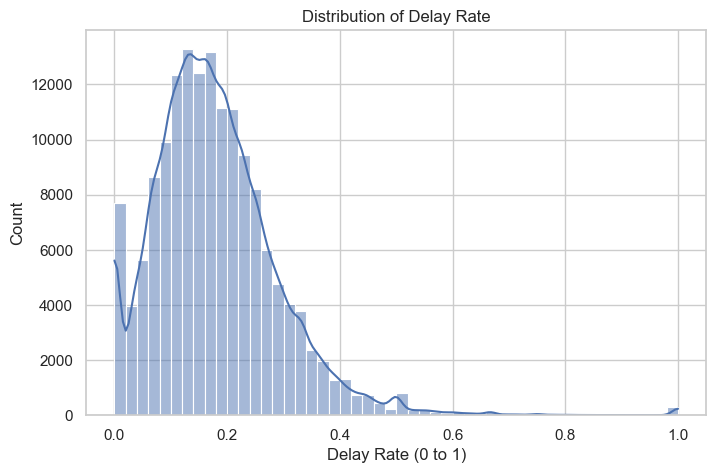

In [32]:
# Distribution of Delay Rate

plt.figure(figsize=(8, 5))
sns.histplot(df['delay_rate'], bins=50, kde=True)
plt.title("Distribution of Delay Rate")
plt.xlabel("Delay Rate (0 to 1)")

Text(0.5, 1.0, 'Mothly Average Delay Rate')

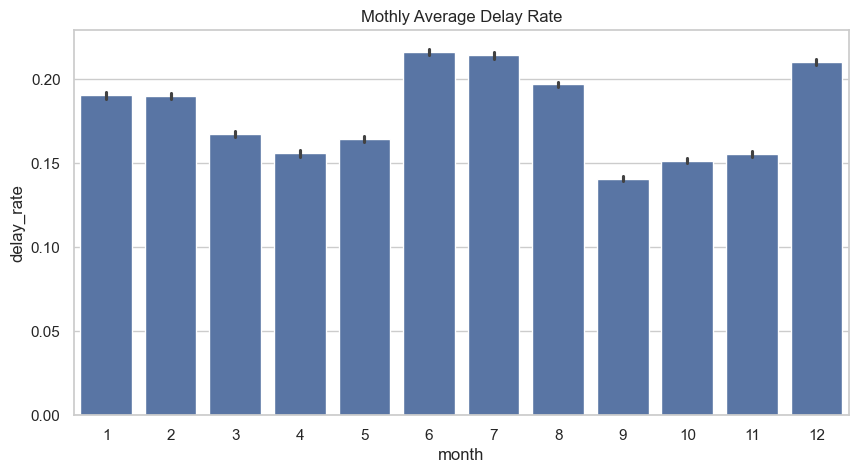

In [33]:
# Delays by Month 

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="month", y="delay_rate")
plt.title("Mothly Average Delay Rate")

([0, 1, 2, 3],
 [Text(0, 0, 'winter'),
  Text(1, 0, 'spring'),
  Text(2, 0, 'summer'),
  Text(3, 0, 'fall')])

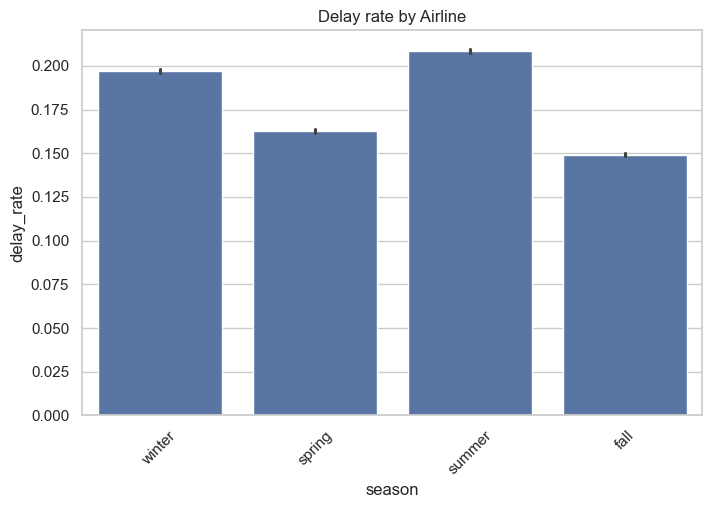

In [34]:
# Delays by Season

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="season", y="delay_rate", order=["winter", "spring", "summer", "fall"])
plt.title("Delay rate by Airline")
plt.xticks(rotation=45)

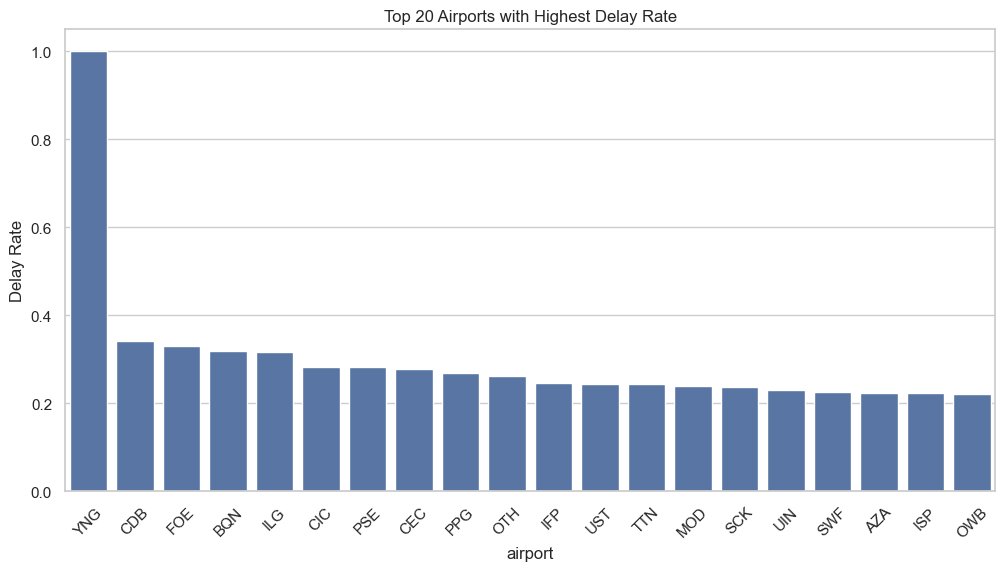

In [35]:
# Top 20 Most Delayed Airports

top_airports = (
    df.groupby("airport")["delay_rate"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(12,6))
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.title("Top 20 Airports with Highest Delay Rate")
plt.xticks(rotation=45)
plt.ylabel("Delay Rate")
plt.show()

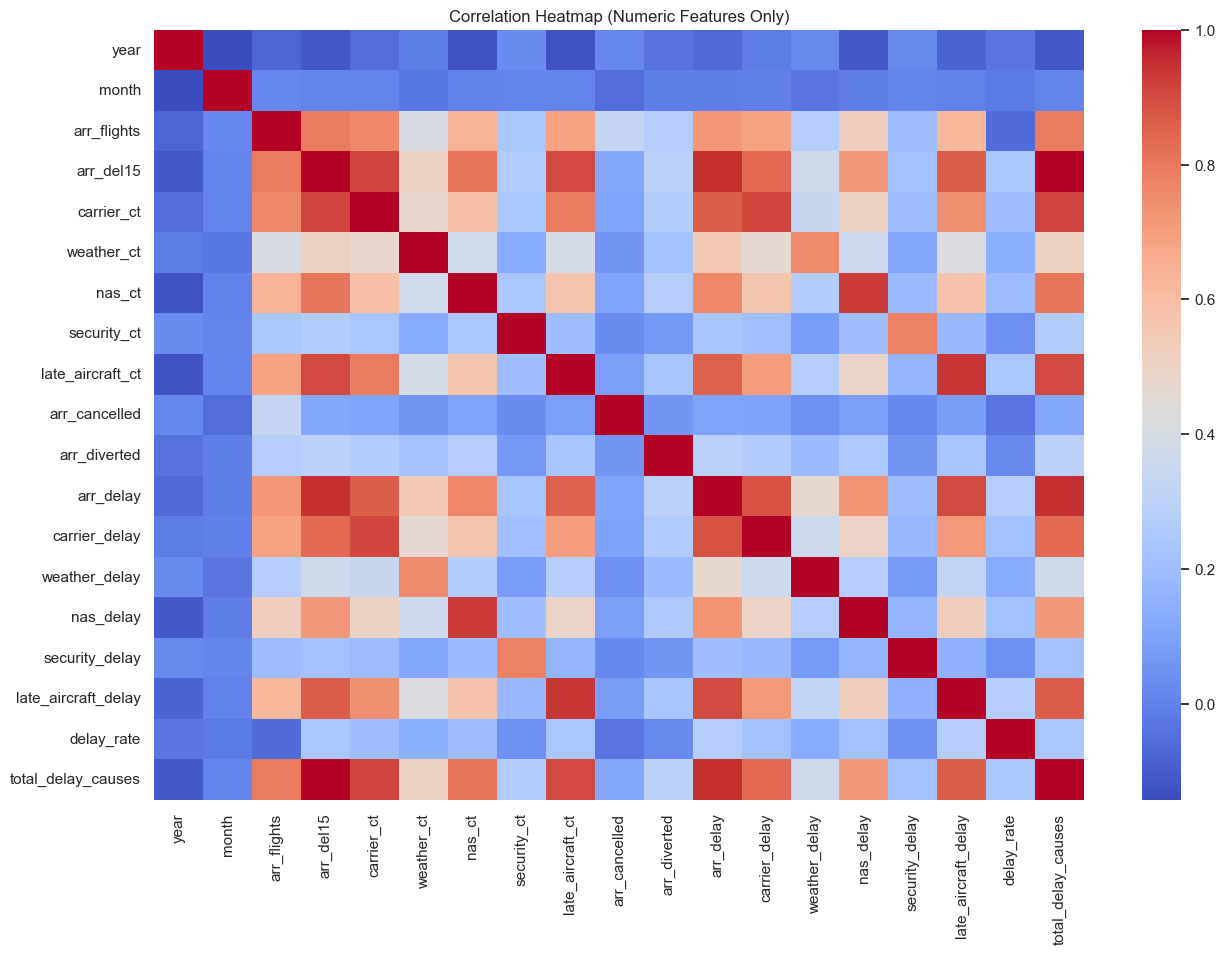

In [36]:
# Correlation heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

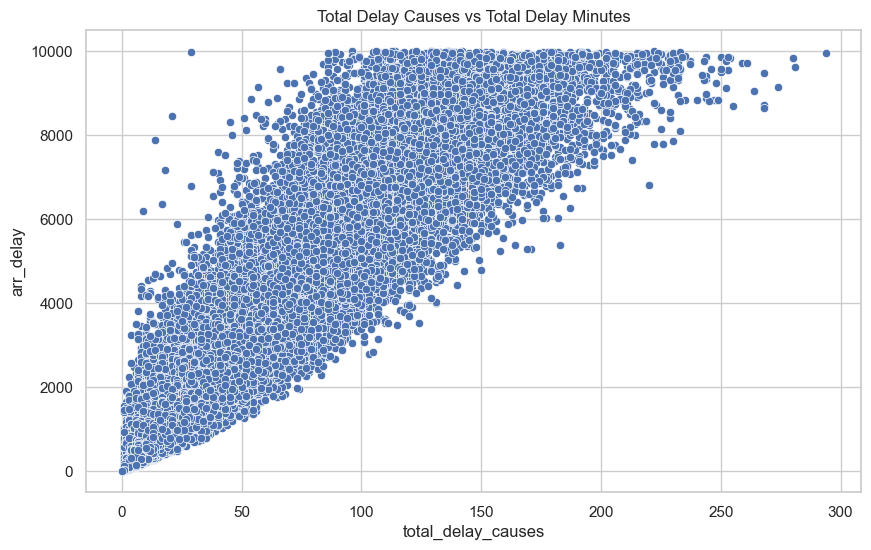

In [37]:
# Relationship Between Causes & Total Delay

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="total_delay_causes", y="arr_delay")
plt.title("Total Delay Causes vs Total Delay Minutes")
plt.show()


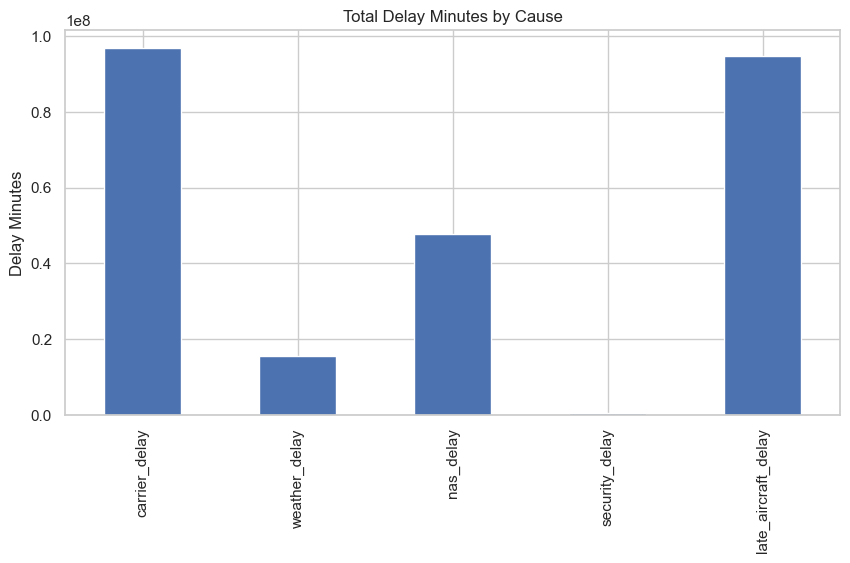

In [38]:
# Delay Causes Breakdown

cause_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]

df[cause_cols].sum().plot(kind="bar", figsize=(10,5))
plt.title("Total Delay Minutes by Cause")
plt.ylabel("Delay Minutes")
plt.show()

### 5. ML Preparation

In [39]:
# Feature Selection

target = "arr_delay"

feature_cols = [
    "year", "month", "arr_flights", 
    "arr_cancelled", "arr_diverted",
    "delay_rate", "total_delay_causes",
    "carrier", "airport", "season"
]

X = df[feature_cols]
y = df[target]

In [40]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
# Create Preprocessing Pipeline

numeric_features = ["year", "month", "arr_flights", "arr_cancelled",
                    "arr_diverted", "delay_rate", "total_delay_causes"]

categorical_features = ["carrier", "airport", "season"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

### 6. Modeling

In [42]:
# Baseline Regression Model

linreg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linreg.fit(X_train, y_train)

y_pred_lr = linreg.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MSE: 306523.07326738583
R²: 0.9220315934504134


In [43]:
# XGBoost Regressor

xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))

XGBoost:
MSE: 208205.35041952736
R²: 0.9470400735766208


### 7. Model Evaluation + Feature Importance

In [44]:
# Evaluate with MAE, RMSE, R²

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R²:", r2)

print("XGBoost Evaluation:")
evaluate_model(y_test, y_pred_xgb)


XGBoost Evaluation:
MAE: 280.9201583209914
RMSE: 456.2952447917109
R²: 0.9470400735766208


Text(0.5, 1.0, 'Actual vs Predicted Delay (XGBoost)')

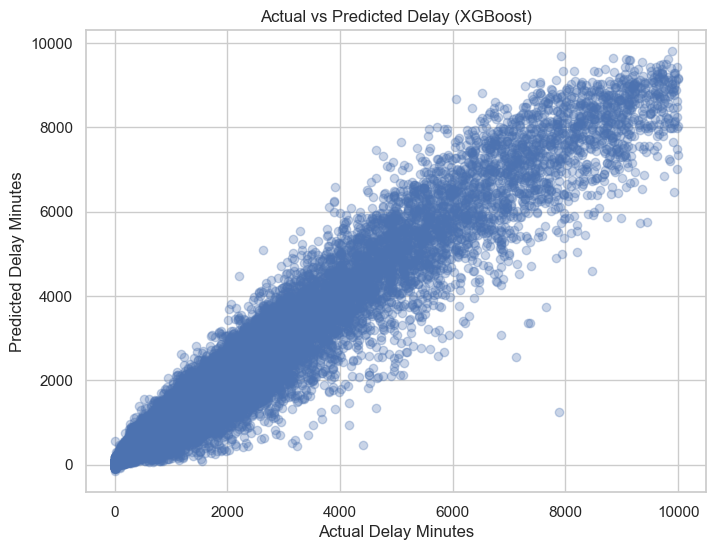

In [45]:
# Plot Actual vs Predicted

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Actual Delay Minutes")
plt.ylabel("Predicted Delay Minutes")
plt.title("Actual vs Predicted Delay (XGBoost)")

Text(0, 0.5, 'Frequency')

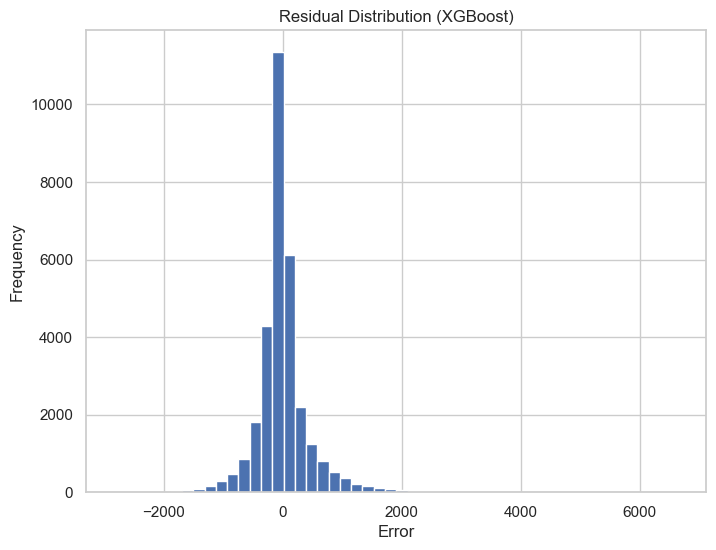

In [46]:
# Plot Residuals

residuals = y_test - y_pred_xgb

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution (XGBoost)")
plt.xlabel("Error")
plt.ylabel("Frequency")

In [47]:
# Feature Importance from XGBoost

model_xgb = xgb.named_steps["model"]

# Get one-hot encoded feature names
ohe = xgb.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

Text(0.5, 1.0, 'Top 20 Most Important Features (XGBoost)')

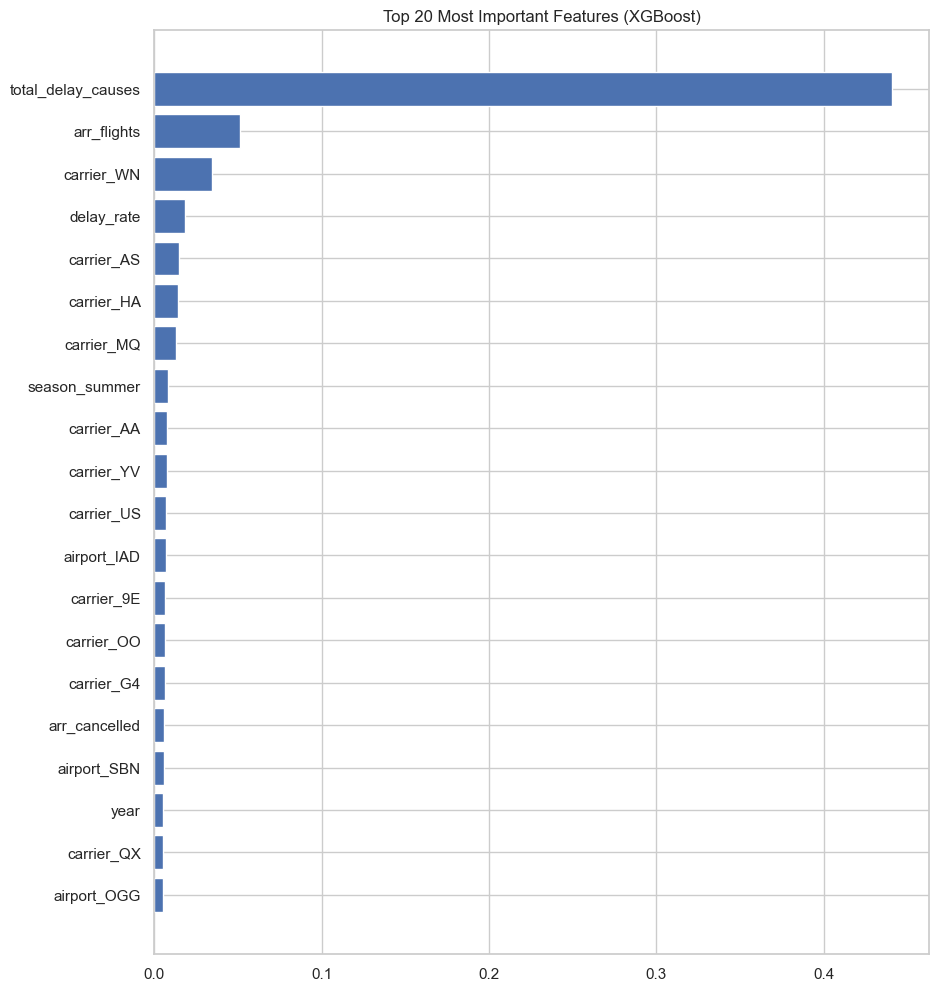

In [48]:
importance = model_xgb.feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,12))
plt.barh(feat_imp["feature"][:20], feat_imp["importance"][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Most Important Features (XGBoost)")

### 8. Save Model

In [ ]:
# Save the full pipeline

joblib.dump(xgb, "../models/xgb_delay_predictor.pkl")

['../models/xgb_delay_predictor.pkl']

In [ ]:
# Load model to verify

loaded_model = joblib.load("../models/xgb_delay_predictor.pkl")
test_pred = loaded_model.predict(X_test[:5])
test_pred

array([ 185.74675, 1248.3535 , 2053.1252 , 7664.703  ,  608.66254],
      dtype=float32)

### 9 . Streamlit Web App (code in app.py)